<a href="https://colab.research.google.com/github/Swastik-Panda2003/BCS-task-Swastik-211091-/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def pdiff(fn, idx, *args):
  #calculating partial derivative of function fn wrt variable present it index idx from list args
    delta = 0.000000000001

    y = fn(*args)

    args = list(args)
    args[idx] += delta

    y1 = fn(*args)
    return (y1 - y)/delta

In [ ]:
# consider a example
def line_func(m,x,c):
  return m*x + c
  

In [ ]:
pdiff_m = pdiff(line_func,0, 2, 3, 4)
pdiff_x = pdiff(line_func,1, 2, 3, 4)
pdiff_c = pdiff(line_func,2, 2, 3, 4)

In [ ]:
print(pdiff_m) #value should be 3
print(pdiff_x) #value should be 2
print(pdiff_c) #value should be 1

3.000266701747023
2.000177801164682
1.000088900582341



# Gradient Descent

In [ ]:
x = np.random.rand(100,1) # generating 100 random numbers

In [ ]:
y = 4 + 3*x + np.random.rand(100,1) # values of y corresponding to x with some added noise

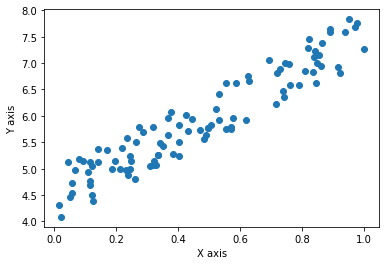

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(x, y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()


In [ ]:
def error(m,c,x,y):
    y_pred = m*x + c
    err = y_pred - y
    return np.sum(err*err)

In [ ]:
print(error(3,4,x,y))

33.4815690472366


In [ ]:
# now lets tune the values of m and c

In [ ]:
def grad_fit(x, y):
    m = np.random.random()
    c = np.random.random()
    learning_rate = 0.001
    for i in range(100):
        dE_dm = pdiff(error, 0, m, c, x, y)
        dE_dc = pdiff(error, 1, m, c, x, y)
        
        m = m - learning_rate * dE_dm
        c = c - learning_rate * dE_dc
    return (m, c)


In [ ]:
print(grad_fit(x,y))

(2.99511604498396, 4.495889215874657)


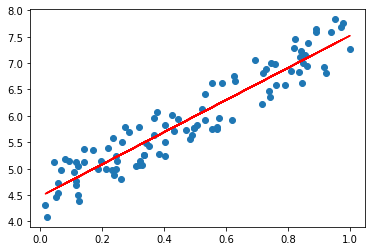

In [ ]:
plt.scatter(x,y)
m,c = grad_fit(x,y)
plt.plot(x,m*x+c,color = 'r')
plt.show()


# Backpropagation

In [ ]:
# I am creating a simple neural network 
# It takes 1 input with corresponding weight w1 and bias b1
# It goes into one hidden layer which has a corresponding weight w2 and bias b2
# This then provides the output value

In [ ]:
def neuron(w1, b1, x):
    # Activation function
    r = w1*x + b1
    return r

def forward_nn(w1, b1, w2, b2, x):
    h1 = neuron(w1, b1, x)
    o1 = neuron(w2, b2, h1)
    return o1

def sq_error(o1, yy):
    e = o1 - yy
    return e*e

def error_nn(w1, b1, w2, b2, x, yy):
    o1 = forward_nn(w1, b1, w2, b2, x)
    e = o1 - yy
    return e*e

In [ ]:
w1 = 0.5
b1 = 0.4
w2 = 0.3
b2 = 0.1

learning_rate = 0.001

for epoch in range(100):
    for i in range(len(x)):
        X = x[i]
        Y = y[i]
        dE_dw1 = pdiff(error_nn, 0, w1, b1, w2, b2, X, Y)
        dE_db1 = pdiff(error_nn, 1, w1, b1, w2, b2, X, Y)
        dE_dw2 = pdiff(error_nn, 2, w1, b1, w2, b2, X, Y)
        dE_db2 = pdiff(error_nn, 3, w1, b1, w2, b2, X, Y)
        
        w1 = w1 - learning_rate * dE_dw1
        b1 = b1 - learning_rate * dE_db1
        
        w2 = w2 - learning_rate * dE_dw2
        b2 = b2 - learning_rate * dE_db2

In [ ]:
y_bymodel = forward_nn(w1,b1,w2,b2,x)

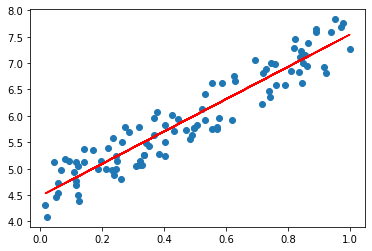

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_bymodel,color = 'r')
plt.show()

In [ ]:
# y = w2(w1*x + b1) + b2
# y = (w2*w1)x + w2*b1 + b2
# m  = w2*w1
# c = w2*b1 + b2

In [ ]:
 m  = w2*w1
 c = w2*b1 + b2
 print(m,c)

[3.06598403] [4.47492985]
